# Cross Spectral Density Estimator Comparison


In [24]:
using PyPlot
using Random


include("../../Examples/Nonlinear Langevin/DataGen.jl")
include("../AnalysisToolbox.jl")
include("../Model_Reduction_Dev.jl")

vector_wiener_filter_fft

## White Noise

In [1]:
steps = 10^7
W = randn(1,steps)

1×10000000 Array{Float64,2}:
 -0.940481  -0.637819  -0.652396  0.930769  …  0.424029  -0.613571  2.17006

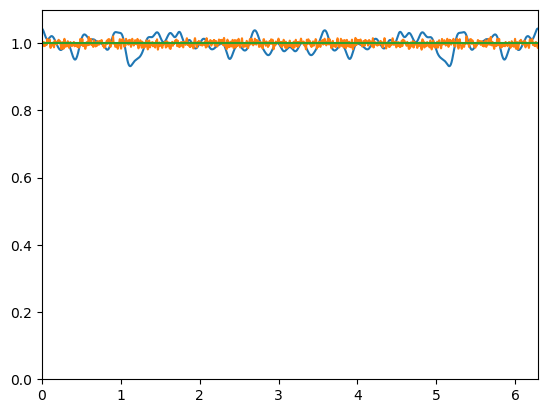

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4-element Array{Float64,1}:
 0.0
 6.283185307179586
 0.0
 1.1

In [7]:
L    = 1000
Nex  = 10^6
win  = "Par"

nfft = 10^5
n    = 2
p    = 1000
ty   = "bin"


spect_D  = z_crossspect_fft_old(W,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(W, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,spect_D[1,1,:])

spect_D_old = spect_D

plot([0, 2π],[1, 1])
axis([0, 2π, 0, 1.1]);

## MA Process

In [9]:
r = [-2 9 .1]

Wr = conv(r,W)[:,2:end]

1×10000001 Array{Float64,2}:
 -7.18869  -4.52963  -7.79688  9.83861  …  -9.81986  19.4692  0.217006

### Spectrum

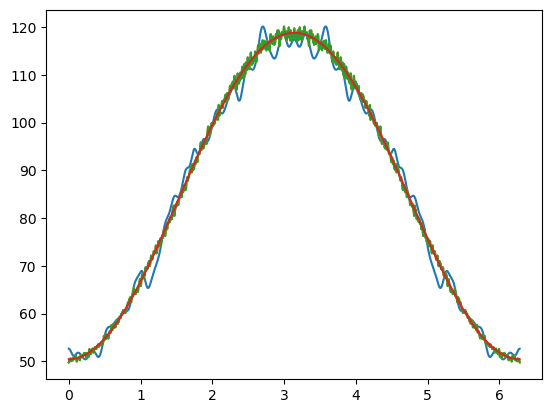

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003E284808>

In [13]:
spect_D  = z_crossspect_fft_old(Wr,Wr;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(Wr, Wr;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[1] + r[2]*exp(-im*θ) + r[3]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ)conj(R(θ)),F_D))

### Cross spectrum

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating


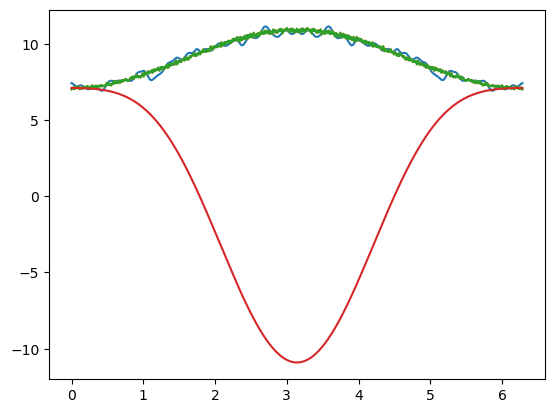

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000063F44FC8>

In [19]:
spect_D  = z_crossspect_fft_old(Wr,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(Wr, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[3] + r[2]*exp(-im*θ) + r[1]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ),F_D))

## DWOL

In [ ]:
# Model run Parameters
steps = 10^5 + 1
scheme = "FE"
t_start = 0
t_stop = 10^4
discard = 100000
sig_init = [1.5]
sigma = [.5]
V_prime = x -> -x.*(x.^2 .- 1)
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)


# Get full model run
Random.seed!(2014)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )
### This is how we set up the signals and 
### predictors They have to me off set so 
### that pred is one index behind signal
### i.e. pre(n) = psi(sig(n-1))
X_sig = X[:,2:end];

Psi(x) = [x; x.^3]
X_pred = get_pred(X,Psi) # Notice it is just 
                         # X get_pred assigns
                         # psi straight across

In [34]:
# Model reduction Parameters
M_out = 100
n = 3
p = 200
par = 55
ty = "bin"
xspec_est = "old"
rl = true
Preds = true
PI = false
rtol = 1e-6

nfft = 1024


S_sp = z_crossspect_fft(X_sig, X_pred; nfft, n, p, ty)
S_dm = z_crossspect_fft_old(X_sig, X_pred; L, Nex = nfft);

sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating
sizes must be the same, taking min and truncating
sig and pred are not the same length. Taking min.

LoadError: ArgumentError: invalid Array dimensions